<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/multiclass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-20 20:34:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  72.3MB/s    in 5.1s    

2023-05-20 20:34:43 (98.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [8]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

there are 2 directories and 0 images in '10_food_classes_all_data' 
there are 10 directories and 0 images in '10_food_classes_all_data/test' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 
there are 

In [9]:
!ls -la 10_food_classes_all_data/test

total 128
drwxr-xr-x 12 root root  4096 May 20 20:34 .
drwxr-xr-x  4 root root  4096 May 20 20:34 ..
drwxr-xr-x  2 root root 12288 May 20 20:34 chicken_curry
drwxr-xr-x  2 root root 12288 May 20 20:34 chicken_wings
drwxr-xr-x  2 root root 12288 May 20 20:34 fried_rice
drwxr-xr-x  2 root root 12288 May 20 20:34 grilled_salmon
drwxr-xr-x  2 root root 12288 May 20 20:34 hamburger
drwxr-xr-x  2 root root 12288 May 20 20:34 ice_cream
drwxr-xr-x  2 root root 12288 May 20 20:34 pizza
drwxr-xr-x  2 root root 12288 May 20 20:34 ramen
drwxr-xr-x  2 root root 12288 May 20 20:34 steak
drwxr-xr-x  2 root root 12288 May 20 20:34 sushi


In [10]:
# set up the train and set directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [11]:
import pathlib
# get the sub directories, labels /classnames

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [12]:
#  plot in curves seperatly
import matplotlib.pyplot as plt

def  plot_loss_curves(history):
  '''
  return seperate loss curves for trainning and validation metrics 
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [13]:
# lets visualise a image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):
  # set up target directories view images 
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot the image
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"immage shape: {img.shape}") # show the shape of the image

  return img

['3475936.jpg']
immage shape: (512, 512, 3)


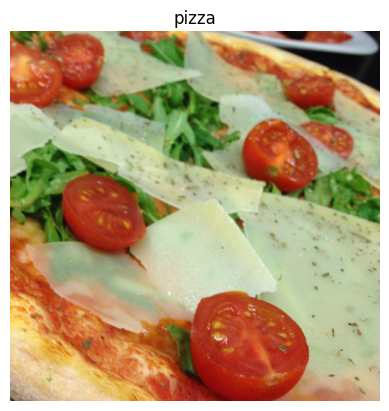

In [14]:
# visualise
import random

img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

## Preprocess the data

In [15]:
# data preprocessing with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen_augmented = ImageDataGenerator(rescale = 1/255,
                                         rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                        shear_range=0.2, # shear the image
                                        zoom_range=0.2, # zoom into the image
                                        width_shift_range=0.2, # shift the image width ways
                                        height_shift_range=0.2, # shift the image height ways
                                        horizontal_flip=True)

image_gen = ImageDataGenerator(rescale = 1/255)

In [23]:
print("Augmented training images:")
train_data_aug = image_gen_augmented.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         class_mode = "categorical",
                                                         seed = 42
)


print("Unchanged test images:")
test_data = image_gen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          class_mode = "categorical",
                                          seed = 42)

Augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


## create baseline

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten, Dense, Activation

In [25]:
model_1 = Sequential([
    Conv2D(10,3,input_shape = (224,224,3)),
    Activation(activation="relu"),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu",),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(10,activation = "softmax")      
])


model_1.compile(loss="categorical_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_1 = model_1.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 127s 520ms/step - loss: 2.2850 - accuracy: 0.1313 - val_loss: 2.1650 - val_accuracy: 0.2060
Epoch 2/5
235/235 [==============================] - 122s 521ms/step - loss: 2.1547 - accuracy: 0.2171 - val_loss: 2.0439 - val_accuracy: 0.2708
Epoch 3/5
235/235 [==============================] - 130s 554ms/step - loss: 2.0796 - accuracy: 0.2596 - val_loss: 1.9037 - val_accuracy: 0.3288
Epoch 4/5
235/235 [==============================] - 121s 516ms/step - loss: 2.0422 - accuracy: 0.2763 - val_loss: 1.9230 - val_accuracy: 0.3440
Epoch 5/5
235/235 [==============================] - 122s 520ms/step - loss: 1.9946 - accuracy: 0.3035 - val_loss: 1.8335 - val_accuracy: 0.3836


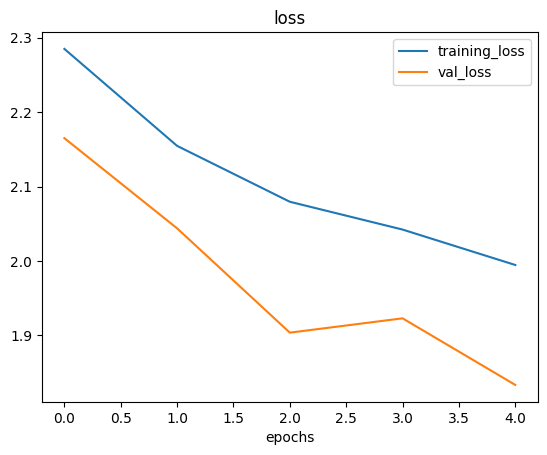

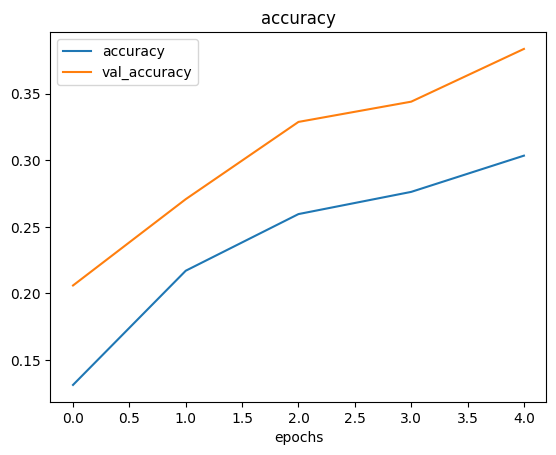

In [26]:
plot_loss_curves(history_1)

In [27]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      